## Семинар 7

# Тема: Полиномиальная регрессия

Нелинейные зависимости в данных встречаются намного чаще линейных. Можно применять линейную модель для подгонки к нелинейным данным. Нужно добавить степени каждого признака в виде новых признаков и далее обучить линейную модель на этом расширенном наборе признаков. Такой прием и называется полиномиальной регрессией. 

1. Полином 2-ой степени $\hat y = w_0 + w_1 {x} + w_2 {x^2}$ тоже самое, что линия регрессии для двух призаков $\hat y = w_0 + w_1 {x}_{1} + w_2 {x}_{2}$, где $x_1 = x, x_2 = x^2$.

2. Полином 2-ой степени для двух признаков $\hat y = w_0 + w_1 {x_1} + w_2 {x_2} + w_3 {x_1}^2 + w_4 {x_1}{x_2}  + w_5 {x_2}^2$ тоже самое, что линейная регрессия для 5 призаков $\hat y = w_0 + w_1 {x}_{1} + w_2 {x}_{2} + w_3 {x}_{3} + w_4 {x}_{4} + w_5 {x}_{5}$, где 
$x_1 = x_1, x_2 = x_2, x_3 = {x_1}^2, x_4 = x_1 x_2, x_5 = {x_2}^2$.

Импортируем необходимые библиотеки:

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import time
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import PolynomialFeatures

### **Задание**: Для обучающей и тестовой частей сгенерированных данных, имеющих два признака и сто наблюдений, получите полиномиальные данные 2 степени, используя PolynomialFeatures.

Генерируем данные, имеющие 2 признака и 100 наблюдений:

In [49]:
X, y = make_regression(n_samples=100, n_features=2, random_state=42)

Разделяем их на обучающую и тестовую части:

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

Из обучающих данных получим полиномиальные данные 2 степени, т.е. к имеющимся признакам добавим столбцы признаков степени 2. Тестовые данные преобразуем аналогичным образом.

In [51]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

Запишем, полученные полиномиальные обучающие данные в датафрейм:

In [52]:
pd.DataFrame(X_poly_train, columns = ['$x_1$', '$x_2$', '$x_1^2$', '$x_1 x_2$', '$x_2^2$']).head()

,$x_1$,$x_2$,$x_1^2$,$x_1 x_2$,$x_2^2$
0,-0.783253,-0.322062,0.613486,0.252256,0.103724
1,0.963376,0.412781,0.928094,0.397663,0.170388
2,0.812526,1.356240,0.660198,1.101980,1.839387
3,-1.328186,0.196861,1.764078,-0.261468,0.038754
4,-0.600639,-0.291694,0.360767,0.175203,0.085085


# Задания для выполнения:

### 1. Сгенерируйте данные и значения целевой переменной для задачи регрессии с 1 признаком и 100 наблюдениями, как шум квадратичной функции $y = (x - 3)^2$ на промежутке от 0 до 7. Визуализируйте сгенерироавнные данные на диаграмме рассеивания.

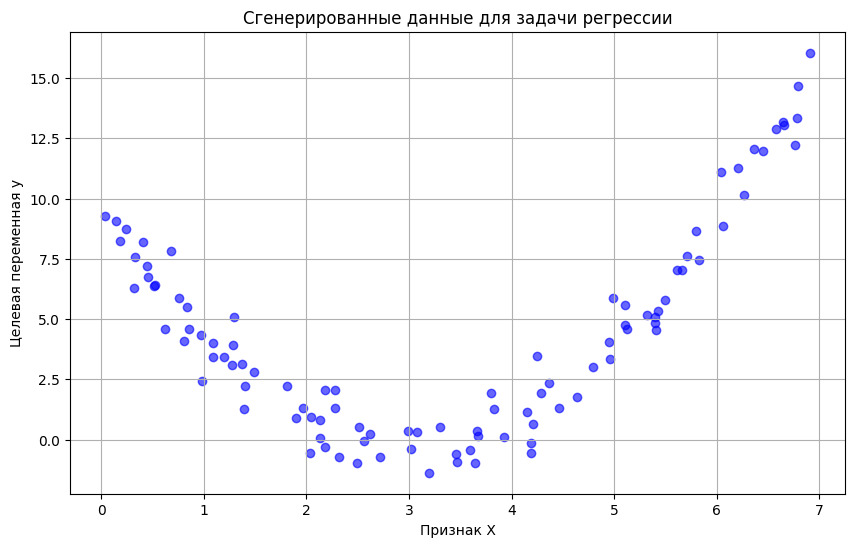

In [53]:
np.random.seed(42)
m = 100
X = 7 * np.random.rand(m, 1)
y = (X[:, 0] - 3)**2 + np.random.randn(m)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.6)
plt.title('Сгенерированные данные для задачи регрессии')
plt.xlabel('Признак X')
plt.ylabel('Целевая переменная y')
plt.grid()
plt.show()


### 2. Разделите данные на обучающую и тестовую части в соотношении 3:1, зафиксировав random_state=0. Выведите их размеры. Визуализируйте данные на диаграмме рассеивания, подкрасив обучающую и тестовую части разным цветом.

Размер обучающей выборки: 75
Размер тестовой выборки: 25


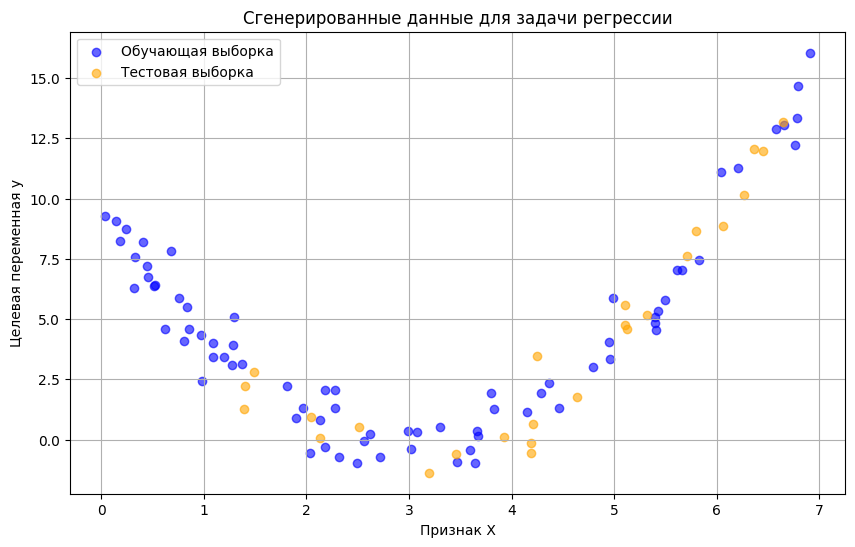

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Обучающая выборка')
plt.scatter(X_test, y_test, color='orange', alpha=0.6, label='Тестовая выборка')
plt.title('Сгенерированные данные для задачи регрессии')
plt.xlabel('Признак X')
plt.ylabel('Целевая переменная y')
plt.legend()
plt.grid()
plt.show()


### 3. Реализуйте модель линейной регрессии LinеarRegression на sklearn. Для этого создайте соответствующий экземпляр класса и обучите на обучающих данных. Выведите коэффициенты линии регрессии.

Коэффициент наклона (коэффициент при X): 0.5690740156123215
Свободный член (смешанное значение): 2.7663221656052333


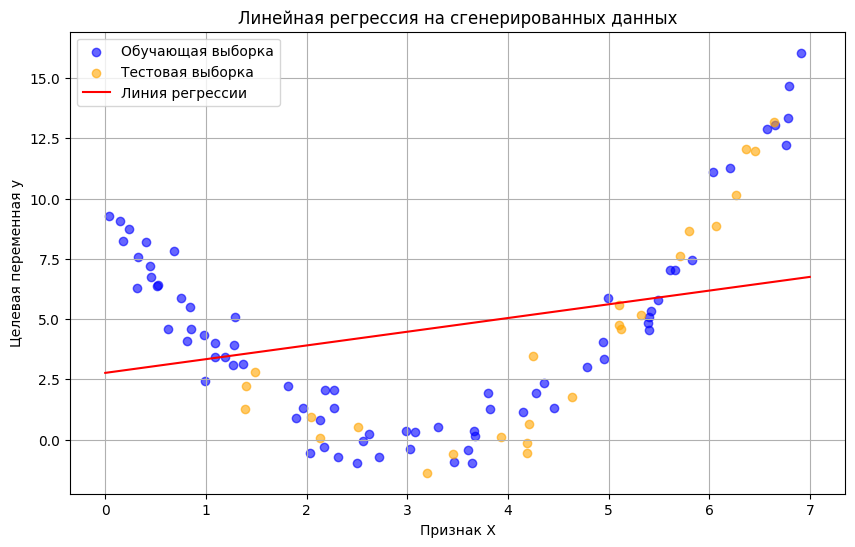

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Коэффициент наклона (коэффициент при X): {model.coef_[0]}")
print(f"Свободный член (смешанное значение): {model.intercept_}")
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Обучающая выборка')
plt.scatter(X_test, y_test, color='orange', alpha=0.6, label='Тестовая выборка')

X_range = np.linspace(0, 7, 100).reshape(-1, 1)
y_pred = model.predict(X_range)
plt.plot(X_range, y_pred, color='red', label='Линия регрессии')

plt.title('Линейная регрессия на сгенерированных данных')
plt.xlabel('Признак X')
plt.ylabel('Целевая переменная y')
plt.legend()
plt.grid()
plt.show()


### 4. Визуализируйте получившуюся линию регрессии на одном графике с диаграммой рассеивания тестовых данных. Сделайте вывод о качестве построенной модели.

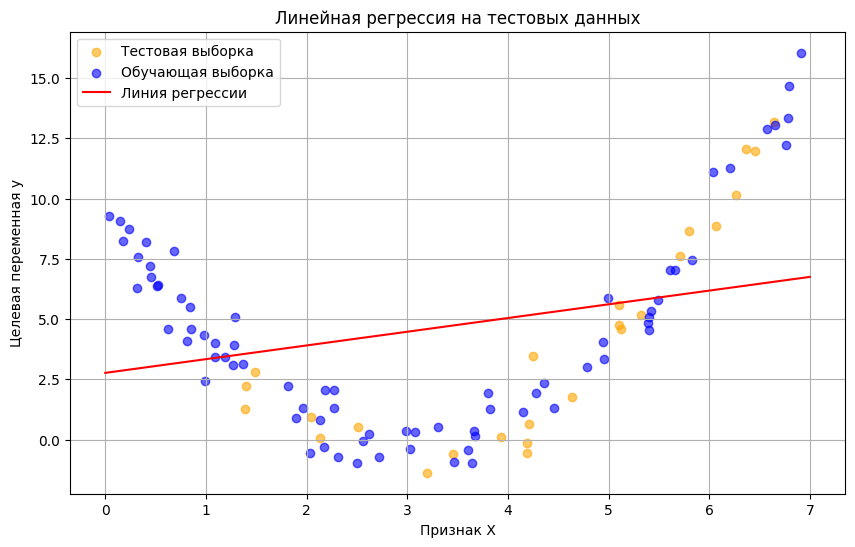

ValueError: Found input variables with inconsistent numbers of samples: [25, 100]

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='orange', alpha=0.6, label='Тестовая выборка')
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Обучающая выборка')
X_range = np.linspace(0, 7, 100).reshape(-1, 1)
y_range_pred = model.predict(X_range)
plt.plot(X_range, y_range_pred, color='red', label='Линия регрессии')
plt.title('Линейная регрессия на тестовых данных')
plt.xlabel('Признак X')
plt.ylabel('Целевая переменная y')
plt.legend()
plt.grid()
plt.show()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")


### 5. Сделайте предсказание на тестовых данных. Оцените качество работы построенной модели по метрикам: коэффициент детерминации и RMSE.

In [59]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Коэффициент детерминации (R^2): {r2:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")


ValueError: Found input variables with inconsistent numbers of samples: [25, 100]

### 6. Из обучающих данных X_train, получите полиномиальные данные 2 степени. Запишите, полученные полиномиальные обучающие данные в датафрейм с названиями колонок $x$ и $x^2$. Из тестовых данных X_test, получите полиномиальные тестовые данные аналогичным образом.

In [63]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
df_train_poly = pd.DataFrame(X_train_poly, columns=['1', 'x', 'x^2'])
df_test_poly = pd.DataFrame(X_test_poly, columns=['1', 'x', 'x^2'])
print("Полиномиальные обучающие данные:")
print(df_train_poly.head())
print("\nПолиномиальные тестовые данные:")
print(df_test_poly.head())


Полиномиальные обучающие данные:
     1         x        x^2
0  1.0  3.826972  14.645714
1  1.0  0.406585   0.165312
2  1.0  0.755240   0.570387
3  1.0  2.316286   5.365182
4  1.0  5.398892  29.148039

Полиномиальные тестовые данные:
     1         x        x^2
0  1.0  1.397716   1.953611
1  1.0  5.107243  26.083934
2  1.0  5.123958  26.254941
3  1.0  6.453120  41.642753
4  1.0  5.103050  26.041121


### 7. Постойте полиномиальную модель регрессии, т.е. обучите модель линейной регрессии на полиномиальных данных. Выведите коэффициенты линии регрессии. 

In [62]:
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
print(f"Коэффициенты линии регрессии:")
print(f"Свободный член (смешанное значение): {model_poly.intercept_:.2f}")
for i, coef in enumerate(model_poly.coef_):
    if i == 0:
        continue
    print(f"Коэффициент при x^{i}: {coef:.2f}")

Коэффициенты линии регрессии:
Свободный член (смешанное значение): 9.54
Коэффициент при x^1: -6.29
Коэффициент при x^2: 1.03


### 8. Визуализируйте совместно найденную гиперплоскость регрессии и пространственную диаграмму рассеивания тестовых данных. Поверните пространственный график на нужный угол так, чтобы было видно, что почти все точки "укладываются" на плоскость.

### 9. Визуализируйте получившуюся квадратичную линию регрессии на одном графике с диаграммой рассеивания тестовых данных.

### 10. Сделайте предсказание на тестовых данных для полиномиальной модели. Оцените качество по метрикам. Сравните с метриками, полученными для линейной модели.

### 11. Сгенерируйте новые данные и значения целевой переменной для задачи регрессии с 2 признаками и 100 наблюдениями, как шум функции двух переменных $y = {x_1}^2 + {x_2}^2$ на квадрате $[-10;10]\times[-10;10]$. Визуализируйте сгенерироавнные данные на пространственной диаграмме рассеивания.

### 12. Разделите данные на обучающую и тестовую части в соотношении 3:1, зафиксировав, random_state=0. Выведите их размеры. Визуализируйте данные на пространственной диаграмме рассеивания, подкрасив обучающую и тестовую части разным цветом.

### 13.  Из щбучающих данных X_train, получите полиномиальные данные 2 степени. Запишите, полученные полиномиальные обучающие данные в датафрейм с названиями колонок $x_1$, $x_2$, ${x_1}^2$, $x_1 x_2$ и ${x_2}^2$. Из тестовых данных X_test, получите полиномиальные тестовые данные аналогичным образом.

### 14. Постойте полиномиальную модель регрессии, т.е. обучите модель линейной регрессии на полиномиальных данных. Выведите коэффициенты линии регрессии. 

### 15.Визуализируйте на пространственном графике получившуюся поверхность регрессии на одном графике с диаграммой рассеивания тестовых данных.

### 16. Сделайте предсказание на тестовых данных для полиномиальной модели. Оцените качество по метрикам.

### 17. Постойте полиномиальную модель линейной регрессии второй степени, используя конвейер. Найдите коэффициенты поверхности регрессии.  

### 18. Оцените качество работы полиномиальной модели с использованием конвейера по метрикам. Убедитесь, что результаты полностью совпадают с теми, когда конвейер не применялся.